In [1]:
import glob,os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
import seaborn as sns
from scipy.stats import *

In [3]:
files = glob.glob('/oak/stanford/groups/mrivas/projects/degas-risk/scorefiles/v2/results/*_center_*20200427_*.tsv')
print('\n'.join(map(os.path.basename,files)))

all_beta_center_p001_20200427_300PCs.spearmanr.tsv
all_z_center_p0001_20200427_300PCs.spearmanr.tsv
all_z_center_p1e-05_20200427_100PCs.spearmanr.tsv
all_beta_center_p001_20200427_100PCs.spearmanr.tsv
all_z_center_p1e-05_20200427_300PCs.spearmanr.tsv
all_z_center_p001_20200427_300PCs.spearmanr.tsv
all_z_center_p001_20200427_100PCs.spearmanr.tsv
all_beta_center_p0001_20200427_500PCs.spearmanr.tsv
all_beta_center_p1e-05_20200427_100PCs.spearmanr.tsv
all_beta_center_p001_20200427_500PCs.spearmanr.tsv
all_z_center_p00001_20200427_100PCs.spearmanr.tsv
all_beta_center_p1e-05_20200427_300PCs.spearmanr.tsv
all_beta_center_p1e-06_20200427_500PCs.spearmanr.tsv
all_z_center_p1e-05_20200427_500PCs.spearmanr.tsv
all_z_center_p0001_20200427_100PCs.spearmanr.tsv
all_beta_center_p00001_20200427_100PCs.spearmanr.tsv
all_beta_center_p1e-05_20200427_500PCs.spearmanr.tsv
all_z_center_p1e-06_20200427_100PCs.spearmanr.tsv
all_beta_center_p0001_20200427_100PCs.spearmanr.tsv
all_beta_center_p0001_20200427_300

In [4]:
kind='RAW'
datas = dict([(os.path.basename(f)[4:-14].replace('_20200427','').replace('_center','').replace('Cs','C'),
               pd.read_table(f, index_col=0, usecols=['PHE','TRAIN_'+kind,'TEST_'+kind])) for f in files])

In [5]:
train=pd.DataFrame([datas[ds]['TRAIN_'+kind] for ds in datas], 
                    index=[ds for ds in datas]).T
train.head()

,beta_p001_300PC,z_p0001_300PC,z_p1e-05_100PC,beta_p001_100PC,z_p1e-05_300PC,z_p001_300PC,z_p001_100PC,beta_p0001_500PC,beta_p1e-05_100PC,beta_p001_500PC,...,z_p00001_500PC,z_p00001_300PC,z_p001_500PC,z_p1e-06_300PC,beta_p00001_500PC,beta_p1e-06_300PC,z_p0001_500PC,z_p1e-06_500PC,beta_p1e-06_100PC,beta_p00001_300PC
BIN1210,-0.005733,0.008741,-0.006515,-0.006394,-0.007149,-0.034579,-0.034956,-0.006946,-0.007290,-0.001382,...,-0.003772,-0.003152,-0.035296,-0.008140,-0.010306,-0.004647,0.006963,-0.008602,0.001356,-0.011198
BIN1677,0.002782,0.000698,-0.000350,0.003714,-0.000226,-0.018216,-0.025727,0.011880,0.008056,0.006877,...,0.006397,0.006598,-0.018115,-0.005964,0.008886,-0.009173,0.002772,-0.005853,0.005991,0.002751
BIN1920,0.017309,-0.007613,0.000740,0.005260,0.001189,0.015848,0.010300,0.005594,0.005403,0.014736,...,-0.003157,-0.002472,0.015443,-0.002474,0.003753,0.016814,-0.009071,-0.001761,0.010309,0.004049
BIN1930,0.014950,-0.019008,-0.004112,0.002406,-0.002866,-0.002284,-0.004880,0.005920,0.001914,0.009576,...,-0.001361,-0.001771,-0.001381,0.006087,0.008058,0.006137,-0.020255,0.006706,0.005549,0.008495
BIN1940,0.008895,0.001057,-0.003122,0.001882,-0.003411,-0.006080,-0.007573,0.002576,-0.000244,0.010542,...,0.000761,0.001519,-0.004543,-0.006538,0.002313,0.004438,0.000286,-0.006415,0.004090,0.004309


In [6]:
test=pd.DataFrame([datas[ds]['TEST_'+kind] for ds in datas], 
                    index=[ds for ds in datas]).T
test.head()

,beta_p001_300PC,z_p0001_300PC,z_p1e-05_100PC,beta_p001_100PC,z_p1e-05_300PC,z_p001_300PC,z_p001_100PC,beta_p0001_500PC,beta_p1e-05_100PC,beta_p001_500PC,...,z_p00001_500PC,z_p00001_300PC,z_p001_500PC,z_p1e-06_300PC,beta_p00001_500PC,beta_p1e-06_300PC,z_p0001_500PC,z_p1e-06_500PC,beta_p1e-06_100PC,beta_p00001_300PC
BIN1210,-0.006254,0.000916,-0.007017,-0.007894,-0.006940,-0.024178,-0.024168,-0.015552,-0.008578,-0.004847,...,-0.000217,-0.000461,-0.025338,-0.007855,-0.009796,-0.007462,0.000928,-0.007938,-0.001432,-0.008753
BIN1677,0.004873,-0.004695,0.008913,0.003416,0.009637,-0.019375,-0.027633,0.010284,0.001441,0.007647,...,0.001417,0.002578,-0.018460,-0.002087,0.000702,0.003826,-0.005931,-0.001206,-0.004046,0.007656
BIN1920,0.006326,0.005991,-0.002001,0.005193,-0.004322,0.013320,0.013679,0.003459,0.010707,0.006488,...,-0.006849,-0.007064,0.011719,-0.015547,0.003567,0.022263,0.003980,-0.017184,0.015849,0.003595
BIN1930,0.003796,-0.020377,-0.010273,-0.003005,-0.009027,0.006387,0.008518,0.004620,0.001339,0.001282,...,-0.002757,-0.002745,0.005114,0.003293,0.001461,0.006136,-0.020823,0.005079,0.002762,0.002952
BIN1940,0.006940,-0.002604,-0.000142,0.007251,0.000221,-0.020743,-0.021983,-0.001568,-0.002022,0.004785,...,0.001383,0.006178,-0.020754,-0.011188,-0.000338,-0.003397,-0.003250,-0.011022,0.000336,0.002362


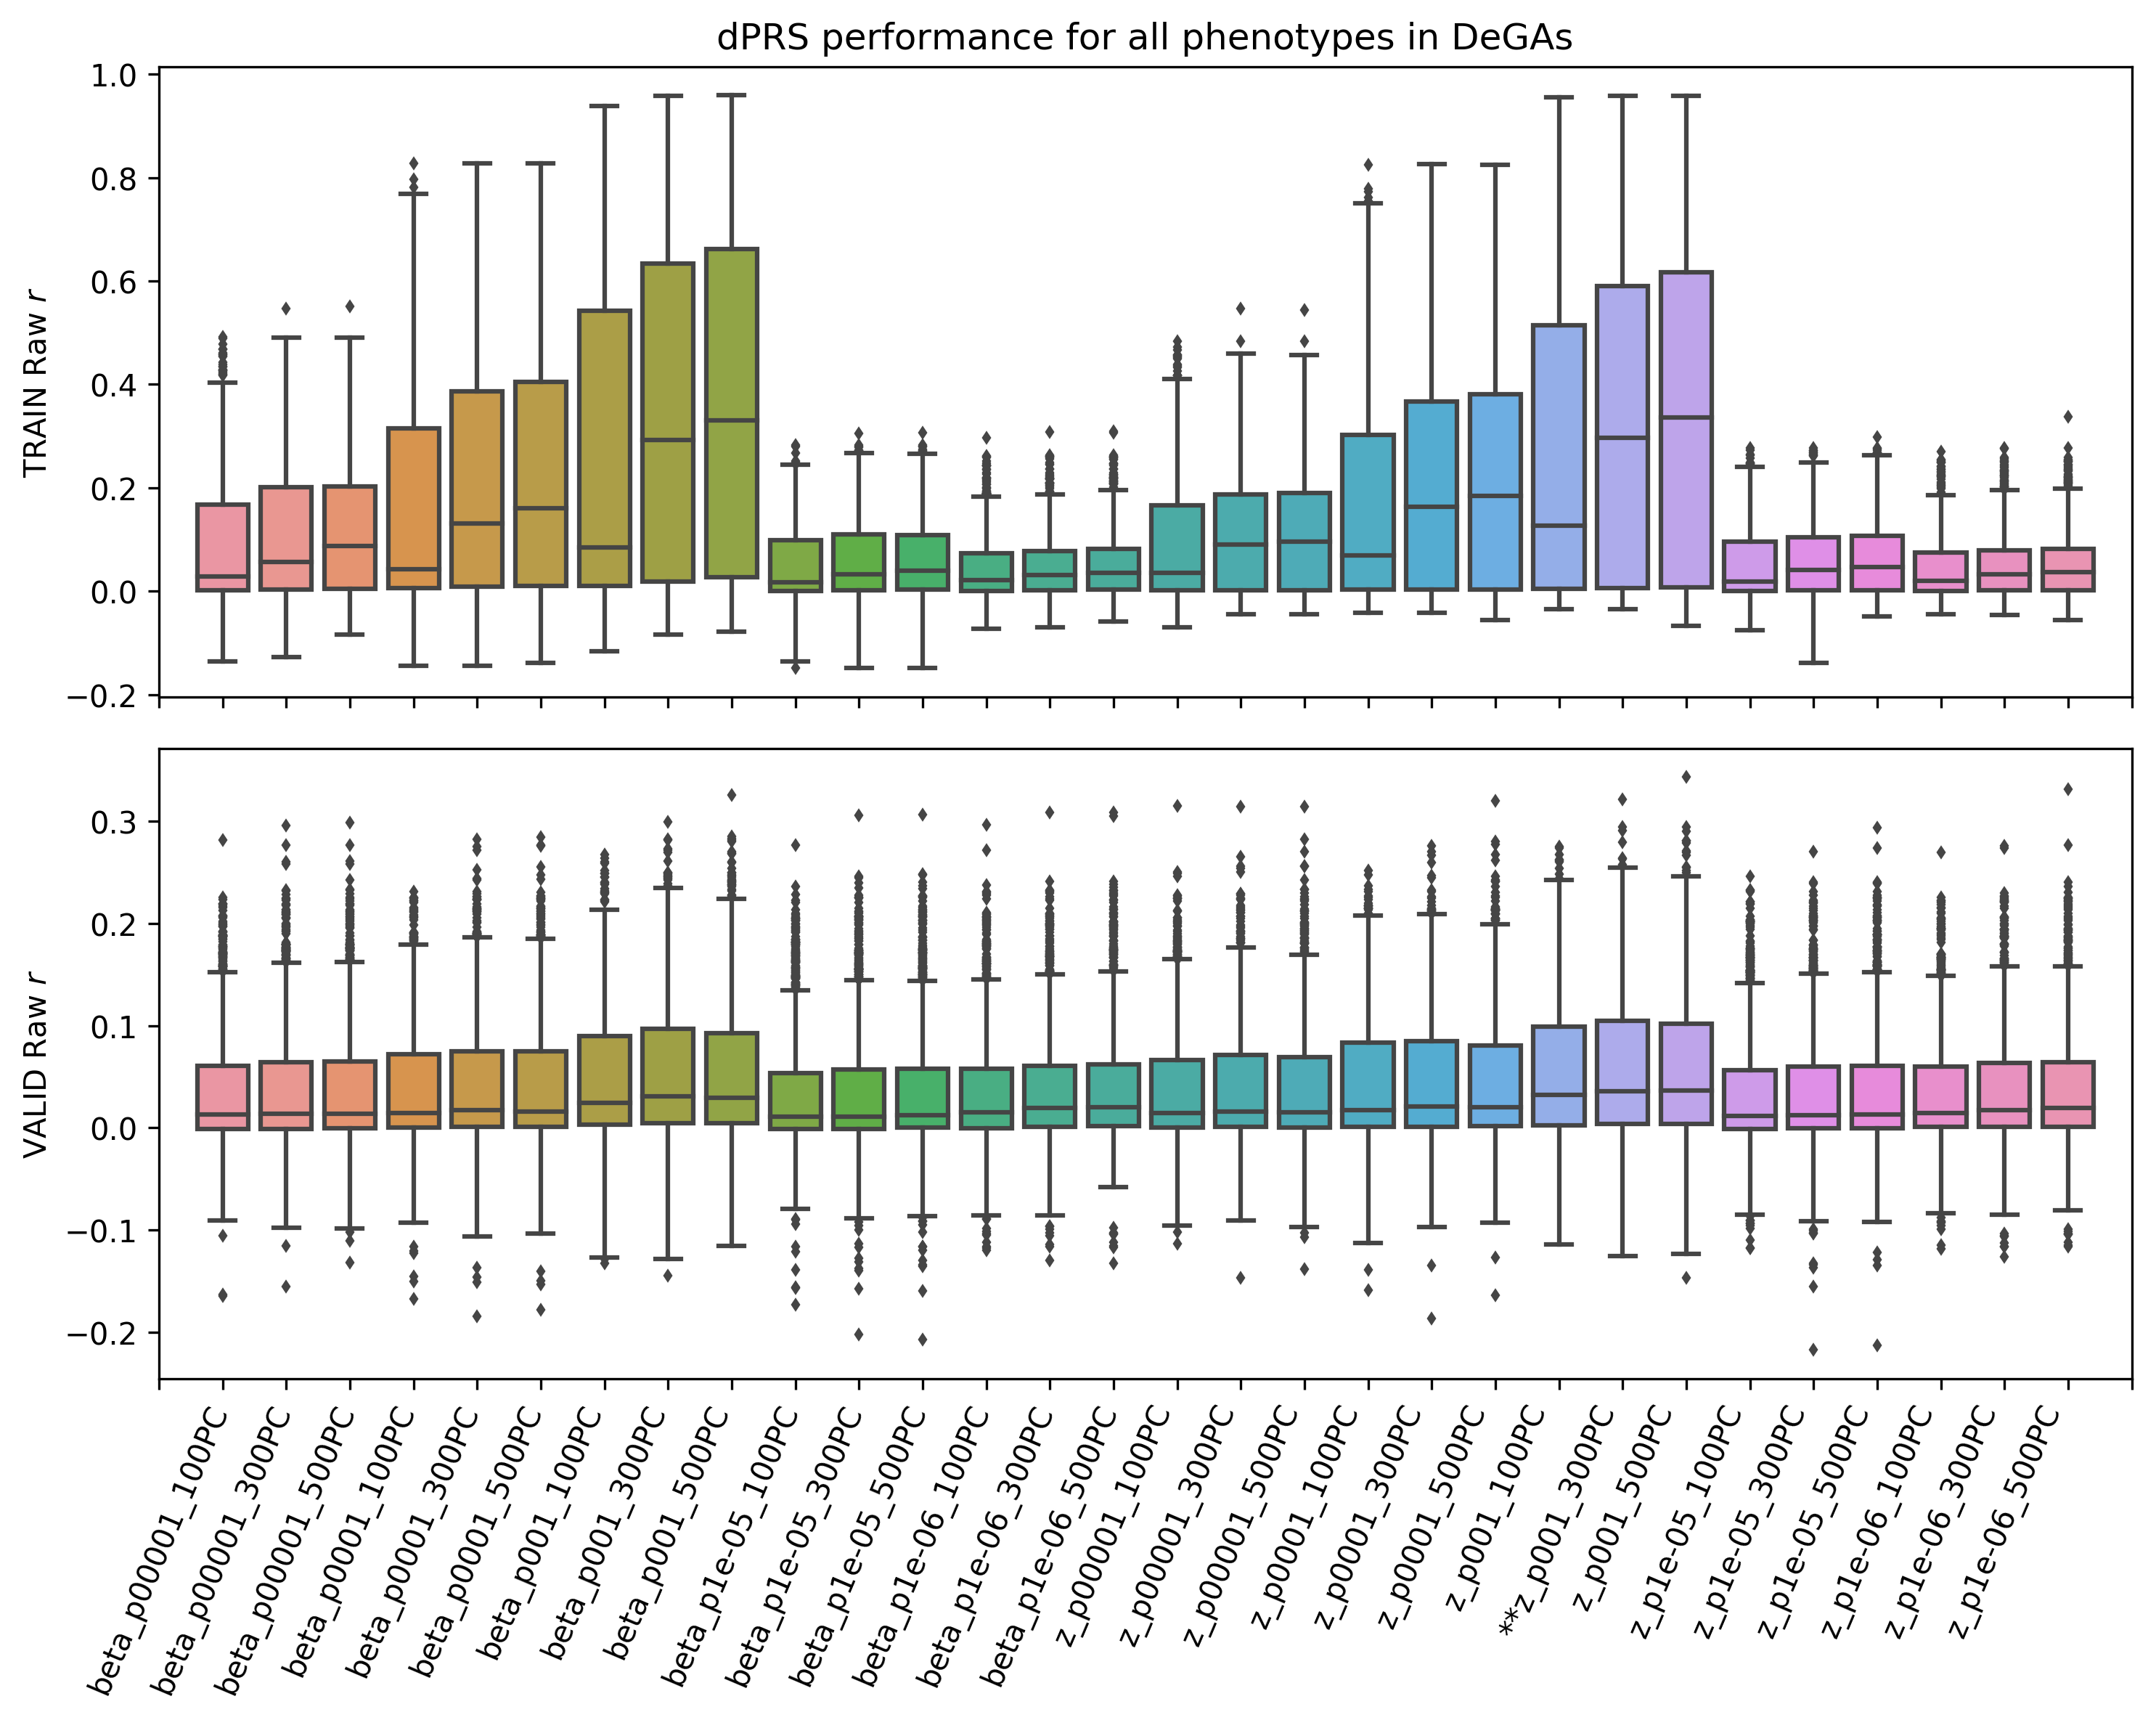

In [7]:
fig=plt.figure(figsize=(10,8),dpi=300)

# train
ax=plt.subplot(211)
sns.boxplot(x='dataset',y='rsq',
            data=train.melt(var_name='dataset',value_name='rsq').sort_values('dataset'),
            fliersize=2, ax=ax)
ax.set_xticks(list(range(-1,len(files)+1)))
ax.set_xticklabels(['' for _ in ax.get_xticklabels()])
ax.set_xlabel('')
ax.set_ylabel(' '.join(['TRAIN',kind.lower().capitalize(),'$r$']))
plt.title('dPRS performance for all phenotypes in DeGAs')

# valid
ax=plt.subplot(212)
sns.boxplot(x='dataset',y='rsq',
            data=test.melt(var_name='dataset',value_name='rsq').sort_values('dataset'),
            fliersize=2, ax=ax)
            #showfliers=0, ax=ax)
ax.set_xticks(list(range(-1,len(files)+1)))
ax.set_xticklabels(map(lambda s:'**'+s if s=='z_p001_300PC' else s, 
                       map(lambda i:str(i.get_text()), ax.get_xticklabels())), rotation=67)
ax.set_xlabel('')
ax.set_ylabel(' '.join(['VALID',kind.lower().capitalize(),'$r$']))
fig.tight_layout()
plt.show()

In [8]:
test.mean().sort_values()[::-1]

z_p001_300PC         0.056893
z_p001_500PC         0.056730
z_p001_100PC         0.054071
beta_p001_300PC      0.052914
beta_p001_500PC      0.052096
beta_p001_100PC      0.048117
z_p0001_300PC        0.044431
z_p0001_500PC        0.044084
z_p0001_100PC        0.043234
beta_p0001_300PC     0.040484
beta_p0001_500PC     0.040180
beta_p1e-06_500PC    0.039421
z_p1e-06_500PC       0.038695
z_p00001_300PC       0.038694
z_p00001_500PC       0.038426
z_p1e-06_300PC       0.037983
beta_p1e-06_300PC    0.037563
beta_p0001_100PC     0.037282
z_p00001_100PC       0.036602
beta_p00001_500PC    0.035838
beta_p00001_300PC    0.035502
z_p1e-06_100PC       0.035243
beta_p1e-06_100PC    0.034571
z_p1e-05_500PC       0.034429
beta_p00001_100PC    0.033630
beta_p1e-05_500PC    0.033355
z_p1e-05_300PC       0.033309
beta_p1e-05_300PC    0.032590
z_p1e-05_100PC       0.032147
beta_p1e-05_100PC    0.030648
dtype: float64

In [9]:
wilcoxon(test[test.mean().sort_values()[::-1].index[0]], 
         test[test.mean().sort_values()[::-1].index[1]])

/share/software/user/open/py-scipy/1.1.0_py36/lib/python3.6/site-packages/scipy/stats/morestats.py:2391: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
/share/software/user/open/py-scipy/1.1.0_py36/lib/python3.6/site-packages/scipy/stats/morestats.py:2392: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


WilcoxonResult(statistic=750312.0, pvalue=0.00902920669336582)

In [10]:
wilcoxon(test[test.mean().sort_values()[::-1].index[1]], 
         test[test.mean().sort_values()[::-1].index[2]])

/share/software/user/open/py-scipy/1.1.0_py36/lib/python3.6/site-packages/scipy/stats/morestats.py:2391: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
/share/software/user/open/py-scipy/1.1.0_py36/lib/python3.6/site-packages/scipy/stats/morestats.py:2392: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


WilcoxonResult(statistic=731617.0, pvalue=0.0005386957089703436)

In [11]:
datas['z_p001_300PC'].sort_values('TRAIN_'+kind).dropna()[::-1].head()

,TRAIN_RAW,TEST_RAW
PHE,,
INI22401,0.958053,0.120643
INI22400,0.938446,0.079686
INI23278,0.931321,-0.072991
INI6183,0.926529,-0.055034
INI22410,0.924292,-0.040896


In [12]:
datas['z_p001_300PC'].sort_values('TEST_'+kind).dropna()[::-1].head()

,TRAIN_RAW,TEST_RAW
PHE,,
INI30100,0.365898,0.321256
INI5257,0.562147,0.294442
INI5265,0.549360,0.290806
INI30080,0.346931,0.279336
INI30040,0.318438,0.263761


In [13]:
pd.DataFrame([datas[d].loc['INI21001',:] for d in datas], index=[d for d in datas]).sort_values('TEST_'+kind)[::-1]

,TRAIN_RAW,TEST_RAW
z_p001_100PC,0.352877,0.214109
beta_p001_300PC,0.386258,0.213593
beta_p001_100PC,0.388656,0.213223
beta_p001_500PC,0.381506,0.210845
z_p001_300PC,0.342902,0.207836
z_p001_500PC,0.337248,0.204758
beta_p0001_100PC,0.278675,0.183985
beta_p0001_300PC,0.269839,0.179884
z_p0001_100PC,0.254179,0.176660
z_p0001_300PC,0.249791,0.173826


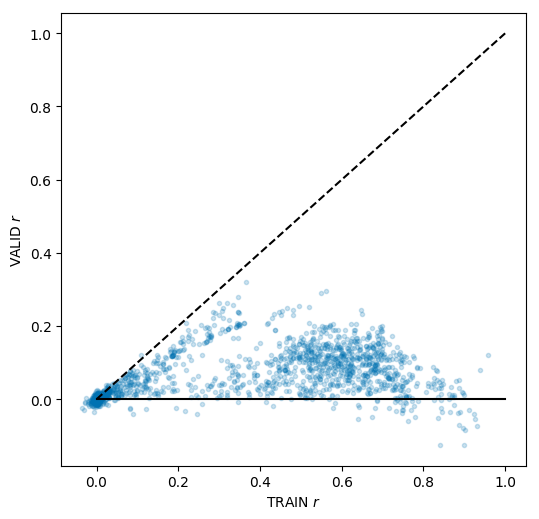

In [25]:
plt.figure(figsize=(6,6), dpi=100)
plt.plot(datas['z_p001_300PC']['TRAIN_'+kind], 
         datas['z_p001_300PC']['TEST_'+kind], '.', alpha=0.2)
plt.plot([0,1],[0,1],'k--')
plt.plot([0,1],[0,0],'k-')
plt.xlabel('TRAIN '+'$r$'), plt.ylabel('VALID '+'$r$')
plt.show()

In [22]:
npzs = glob.glob('/oak/stanford/groups/mrivas/projects/degas-risk/datasets/train/v2/tsvd/*_center_*_20200427_500PCs.npz')
print('\n'.join(map(os.path.basename,npzs)))

all_z_center_p1e-06_20200427_500PCs.npz
all_z_center_p0001_20200427_500PCs.npz
all_beta_center_p001_20200427_500PCs.npz
all_beta_center_p1e-05_20200427_500PCs.npz
all_beta_center_p00001_20200427_500PCs.npz
all_z_center_p001_20200427_500PCs.npz
all_z_center_p1e-05_20200427_500PCs.npz
all_z_center_p00001_20200427_500PCs.npz
all_beta_center_p1e-06_20200427_500PCs.npz
all_beta_center_p0001_20200427_500PCs.npz


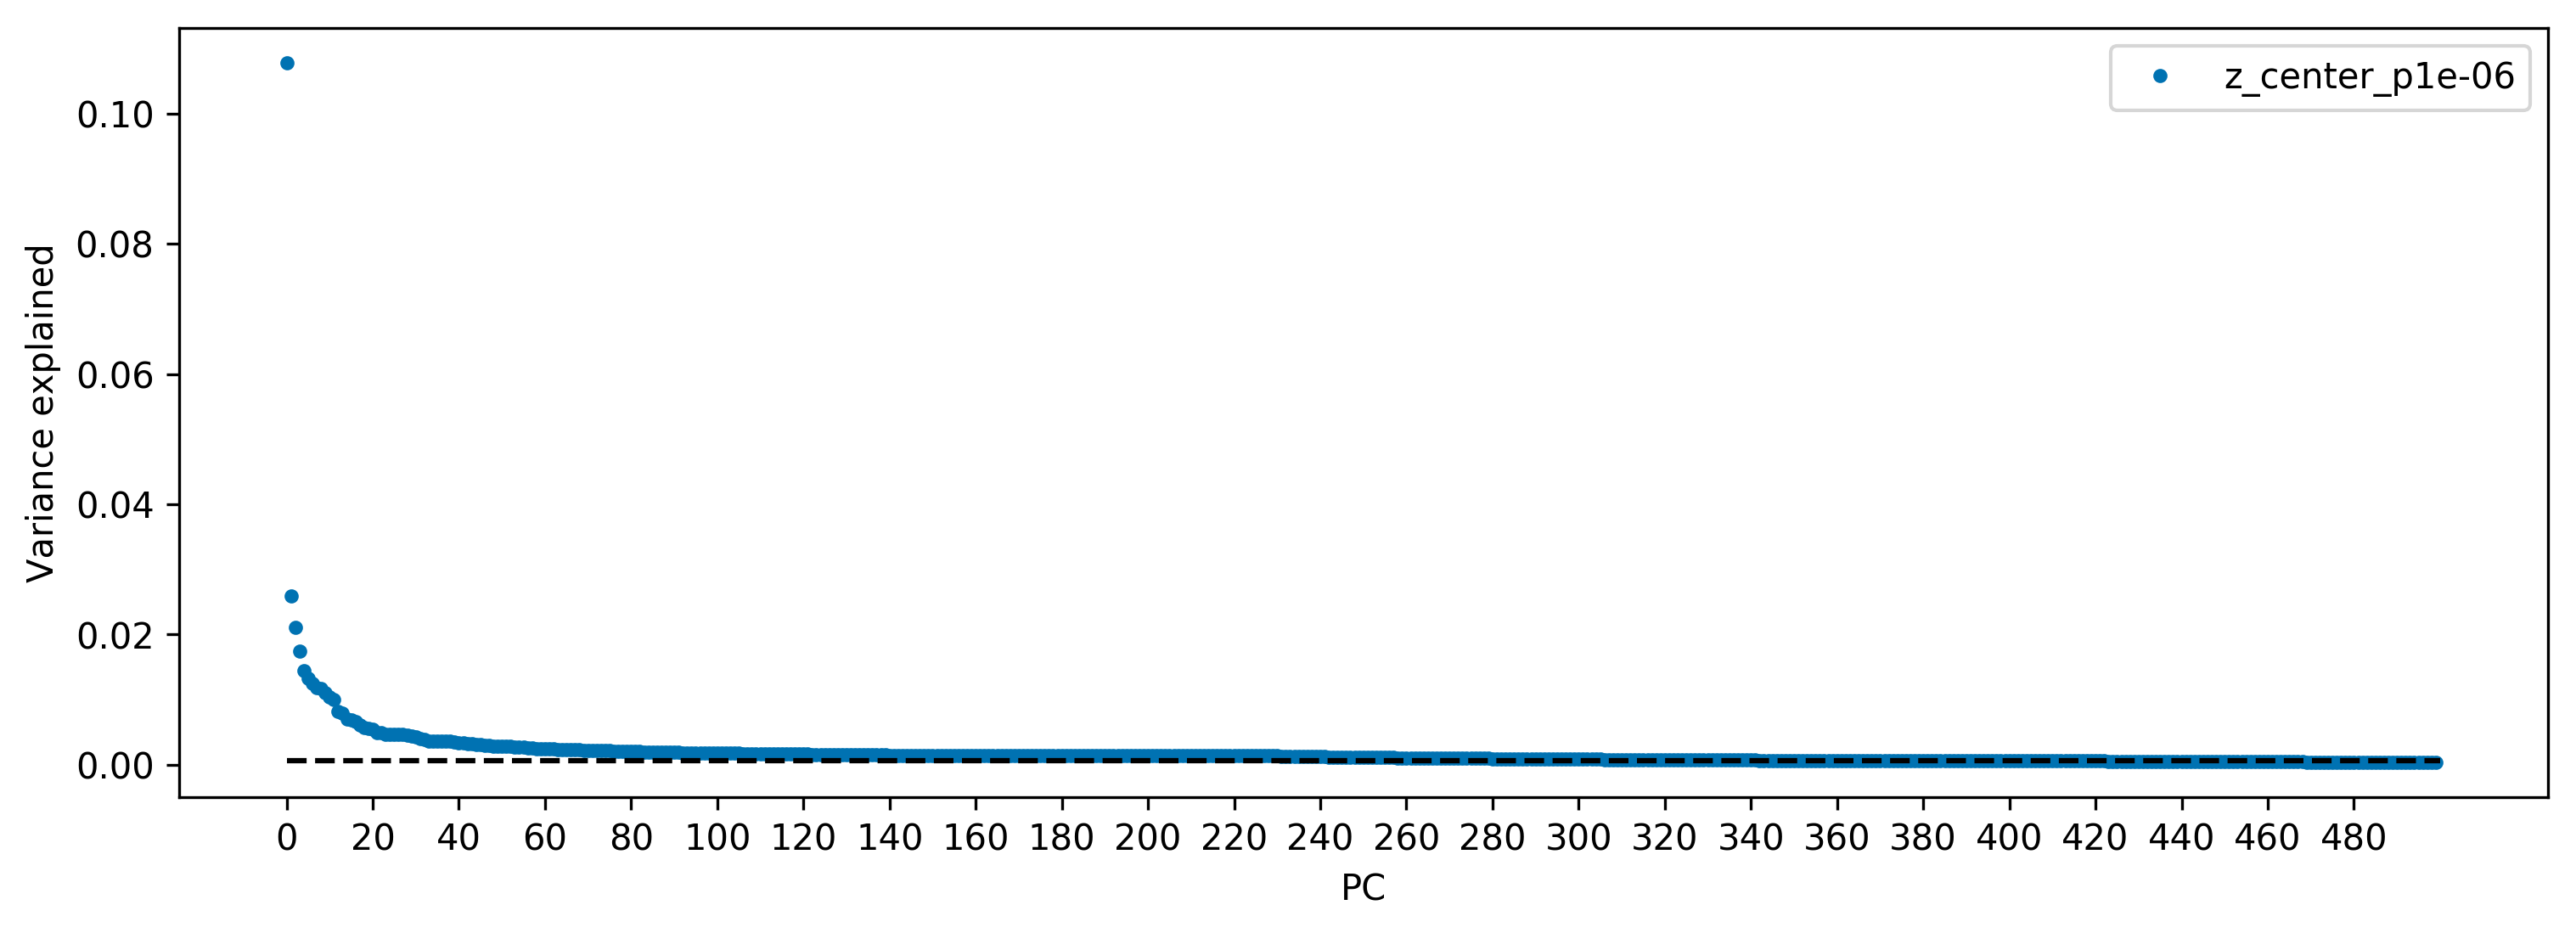

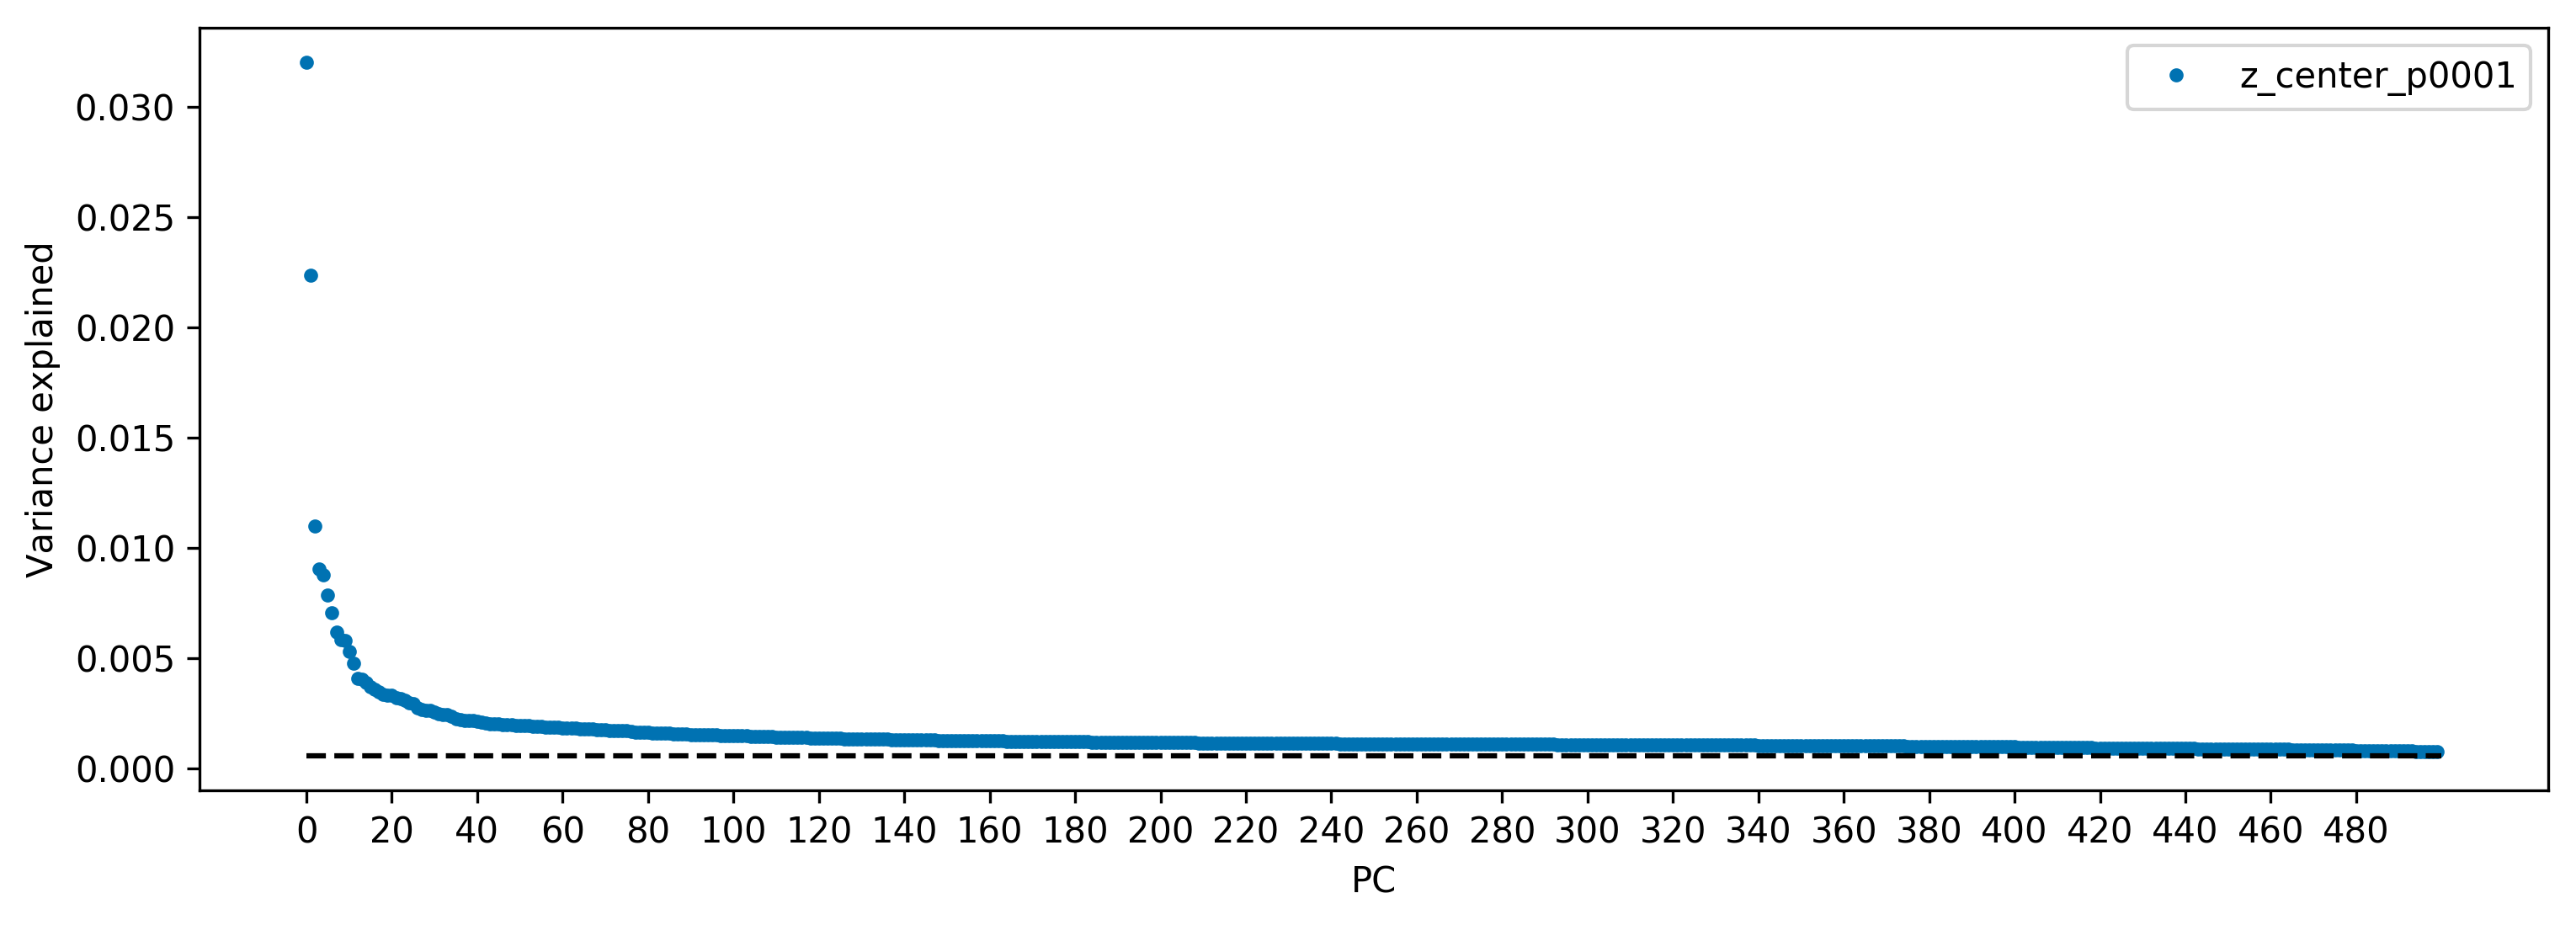

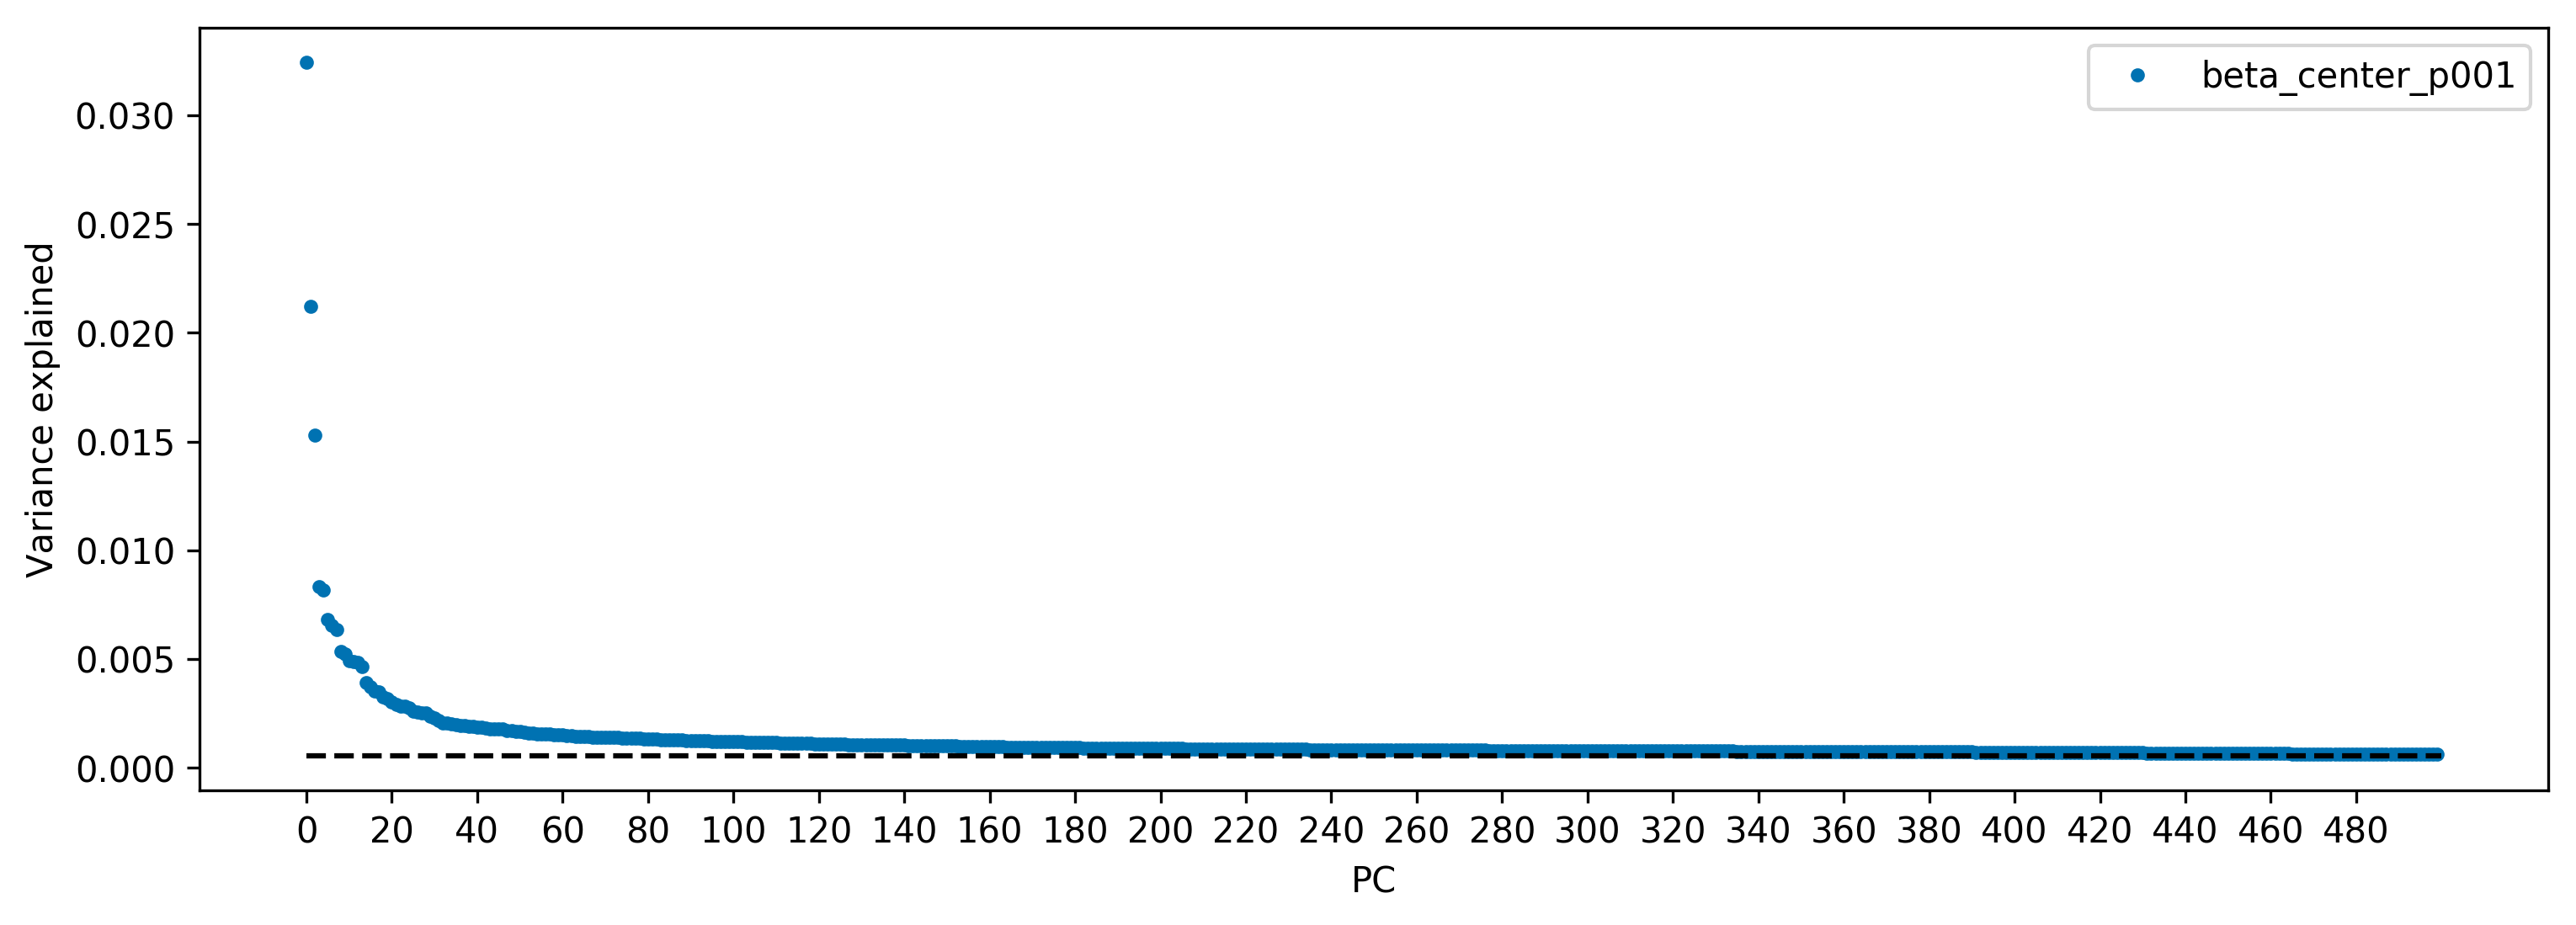

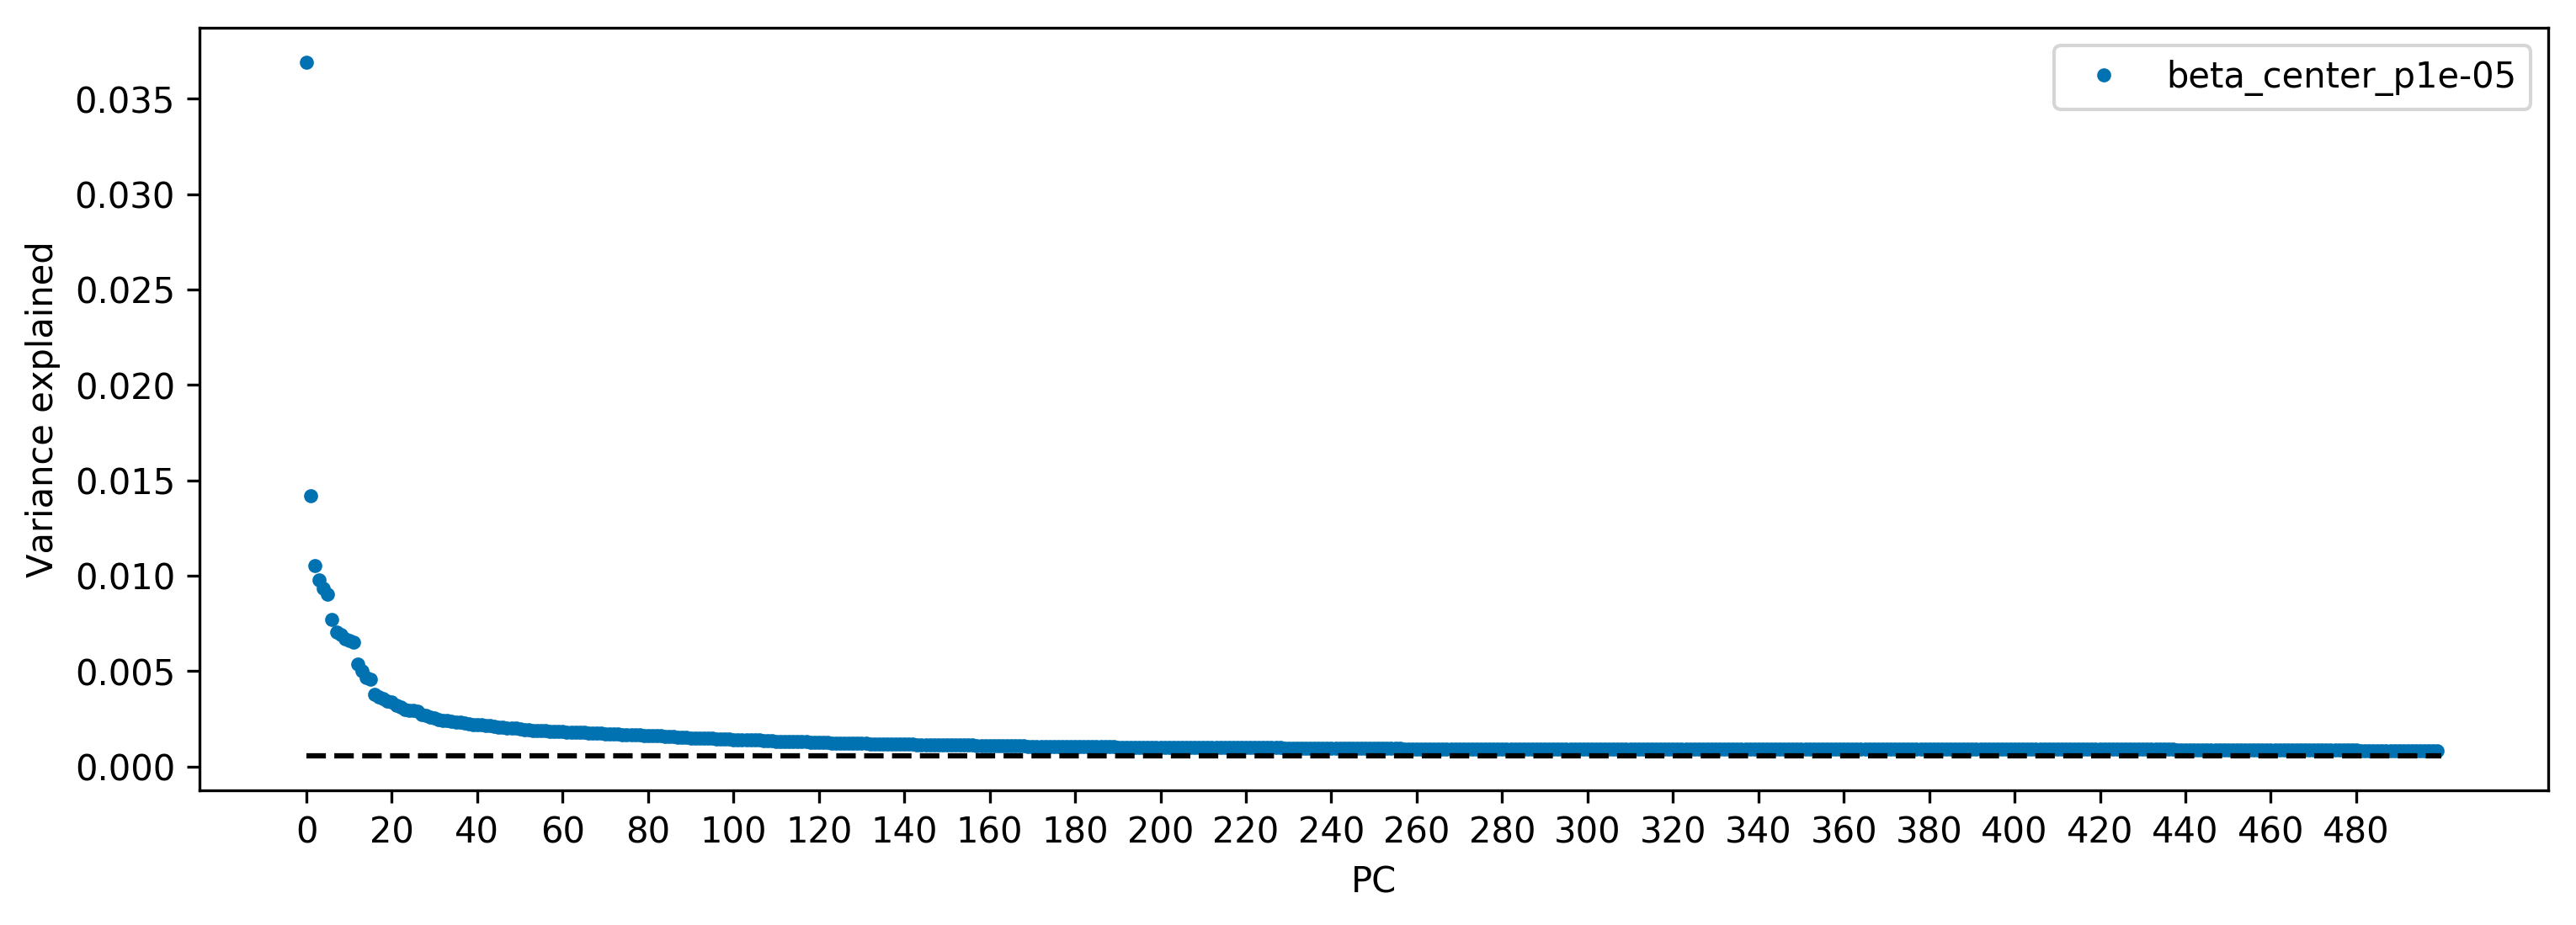

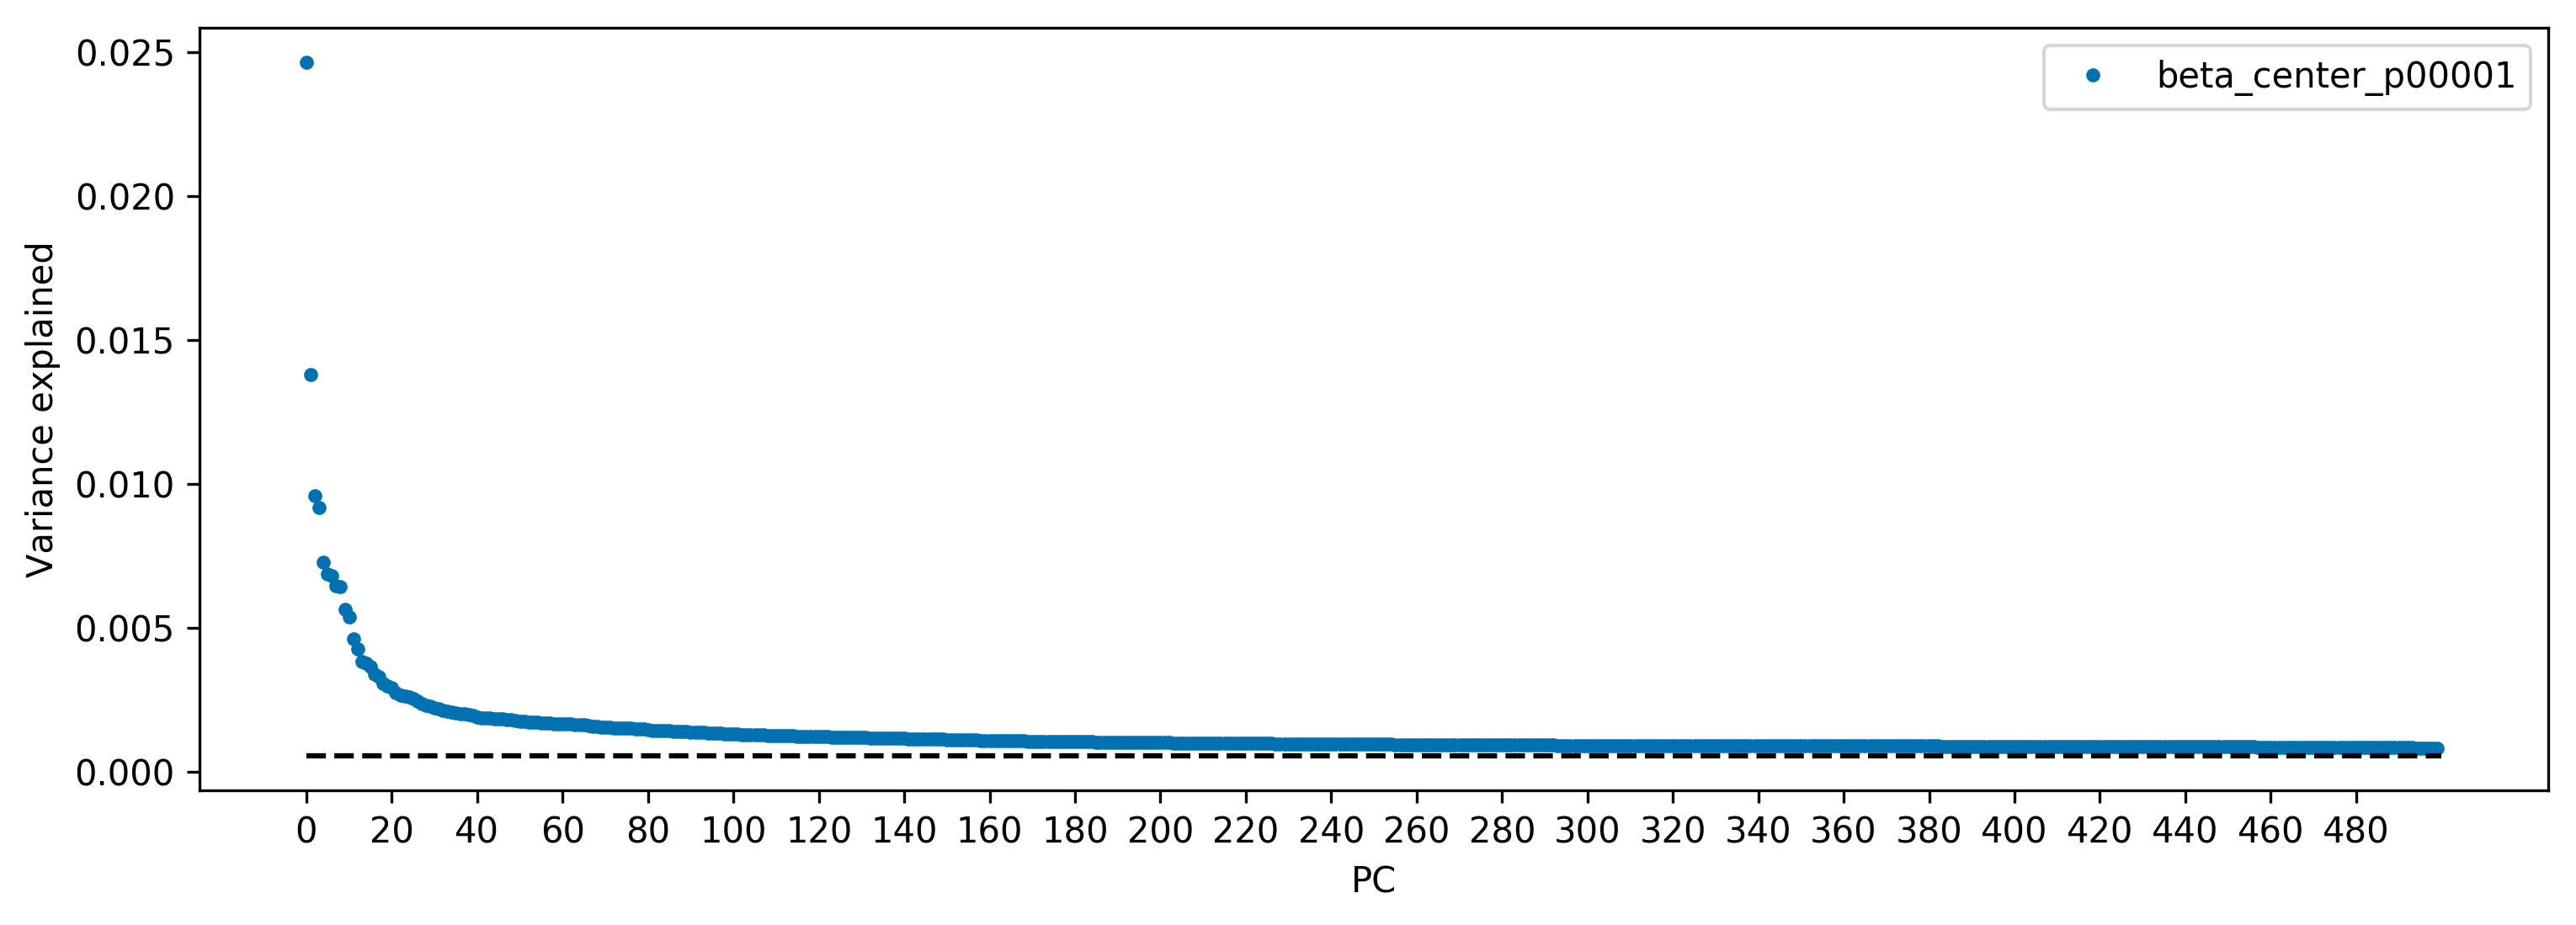

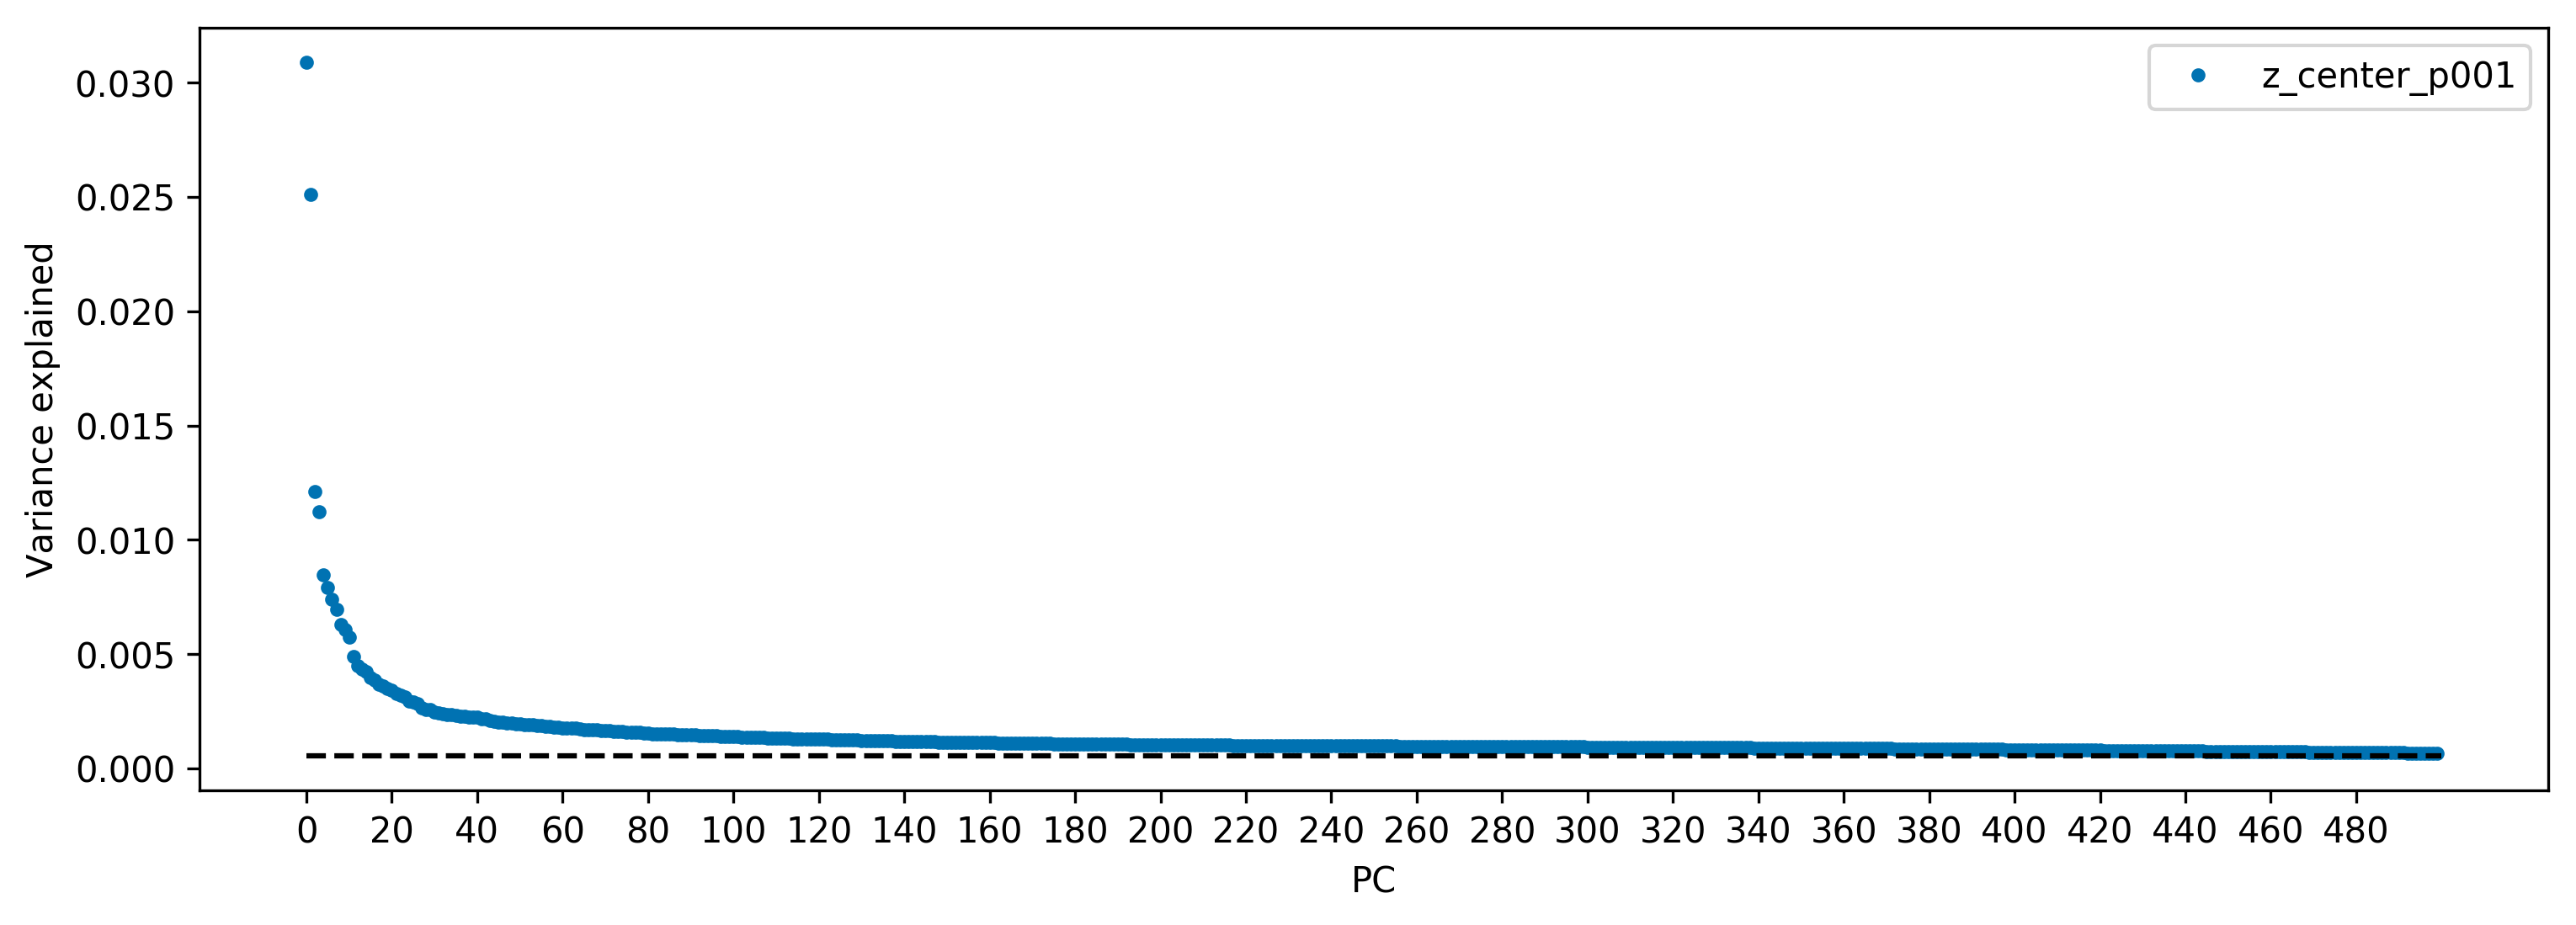

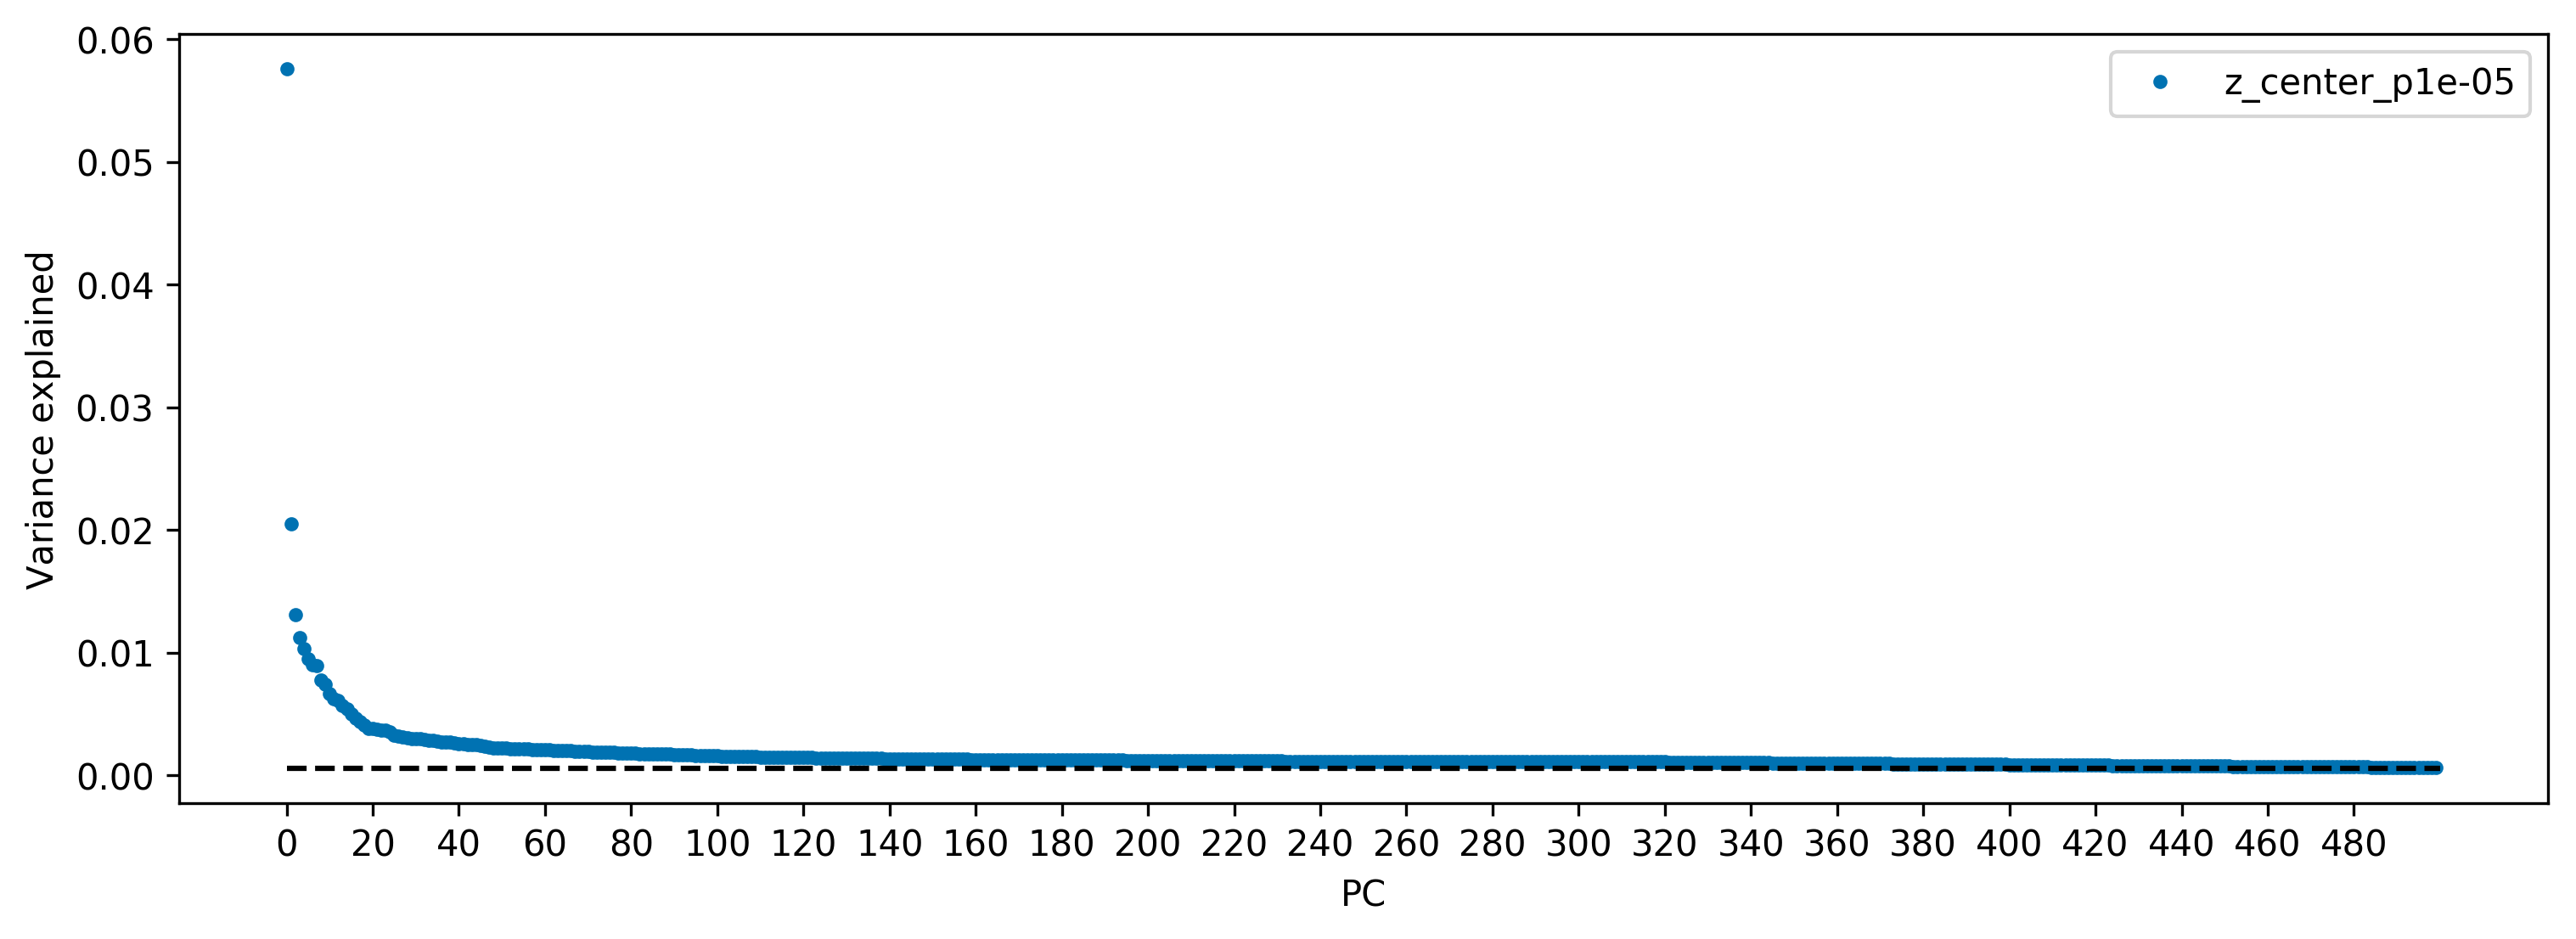

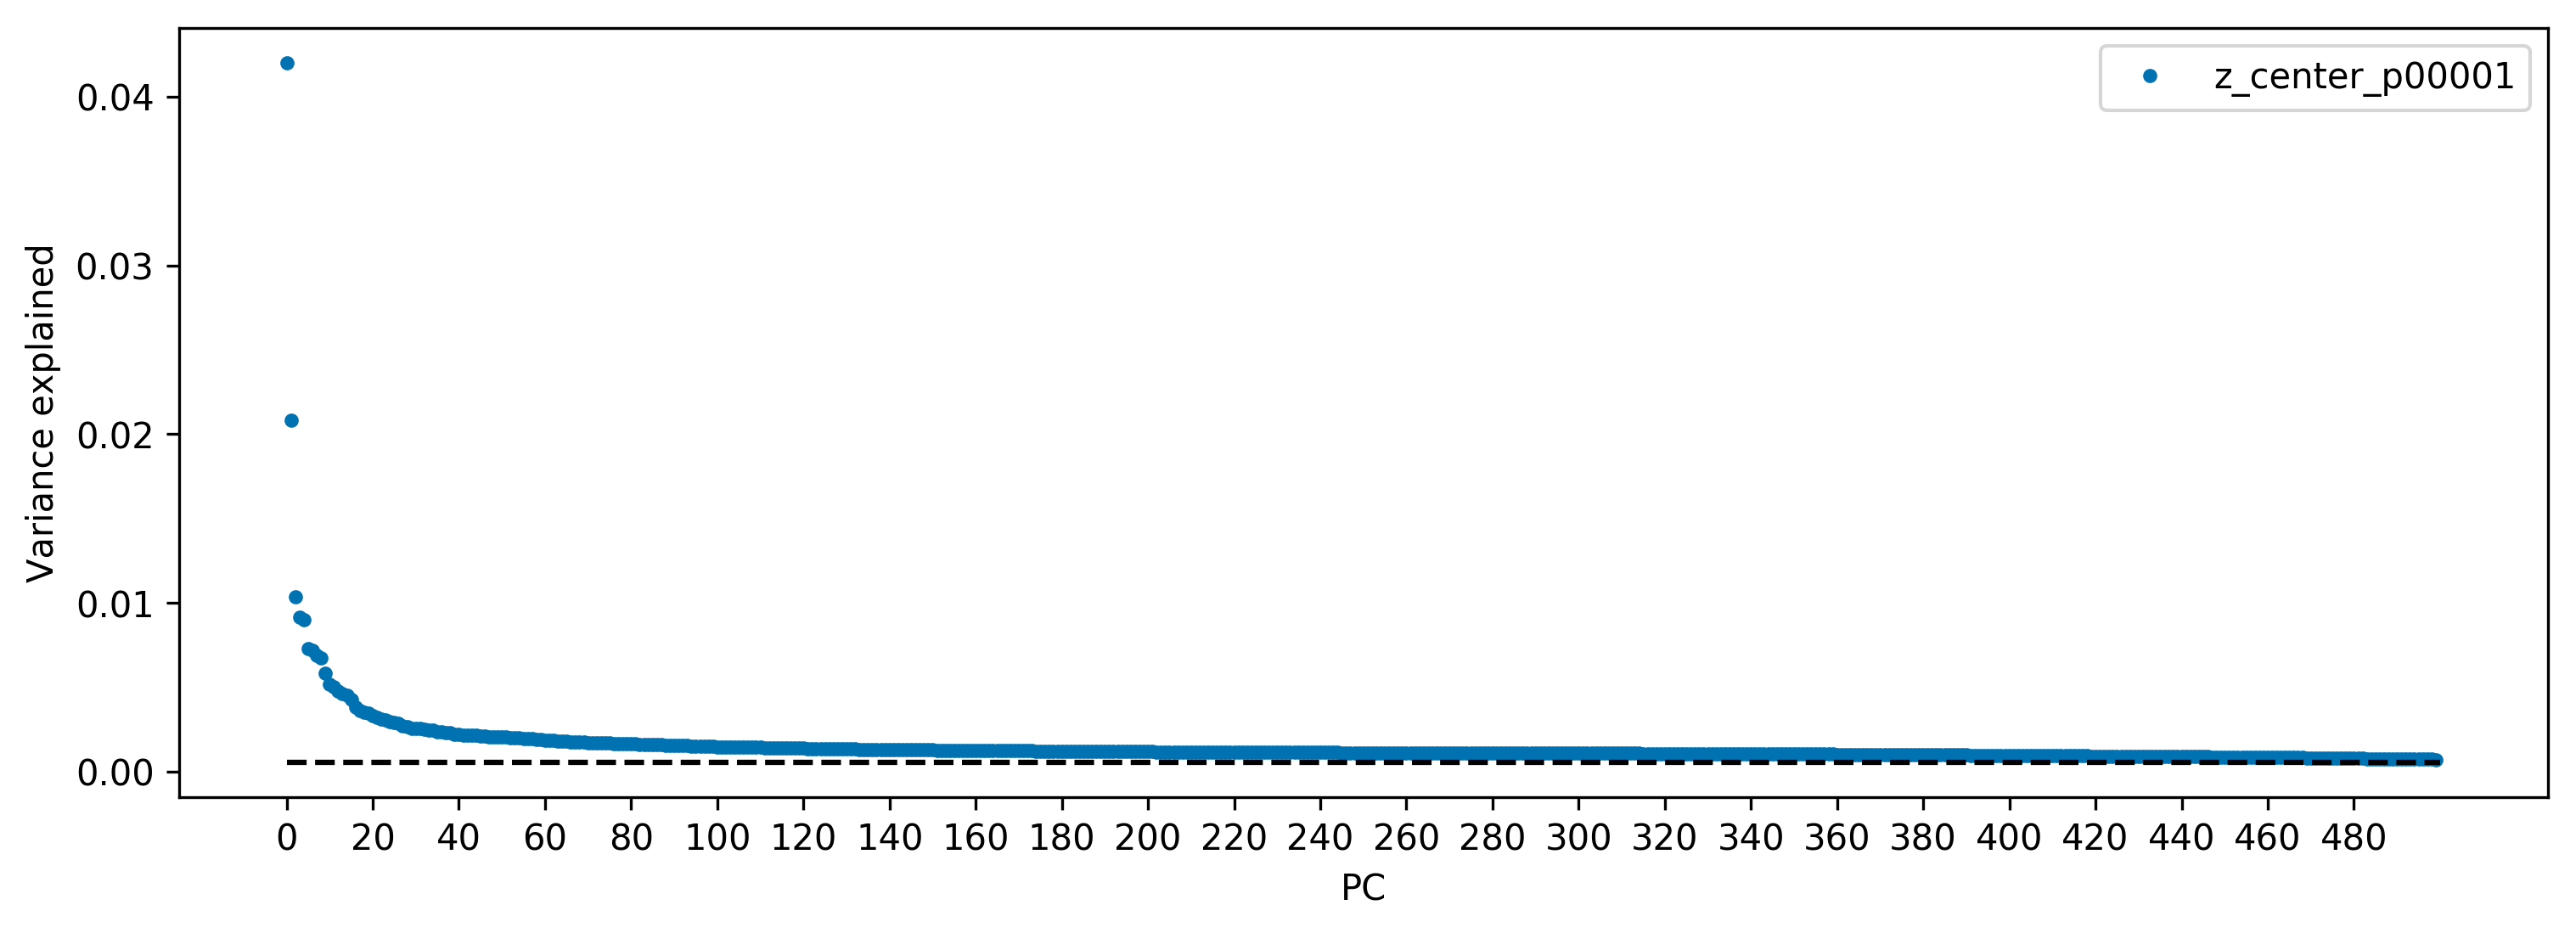

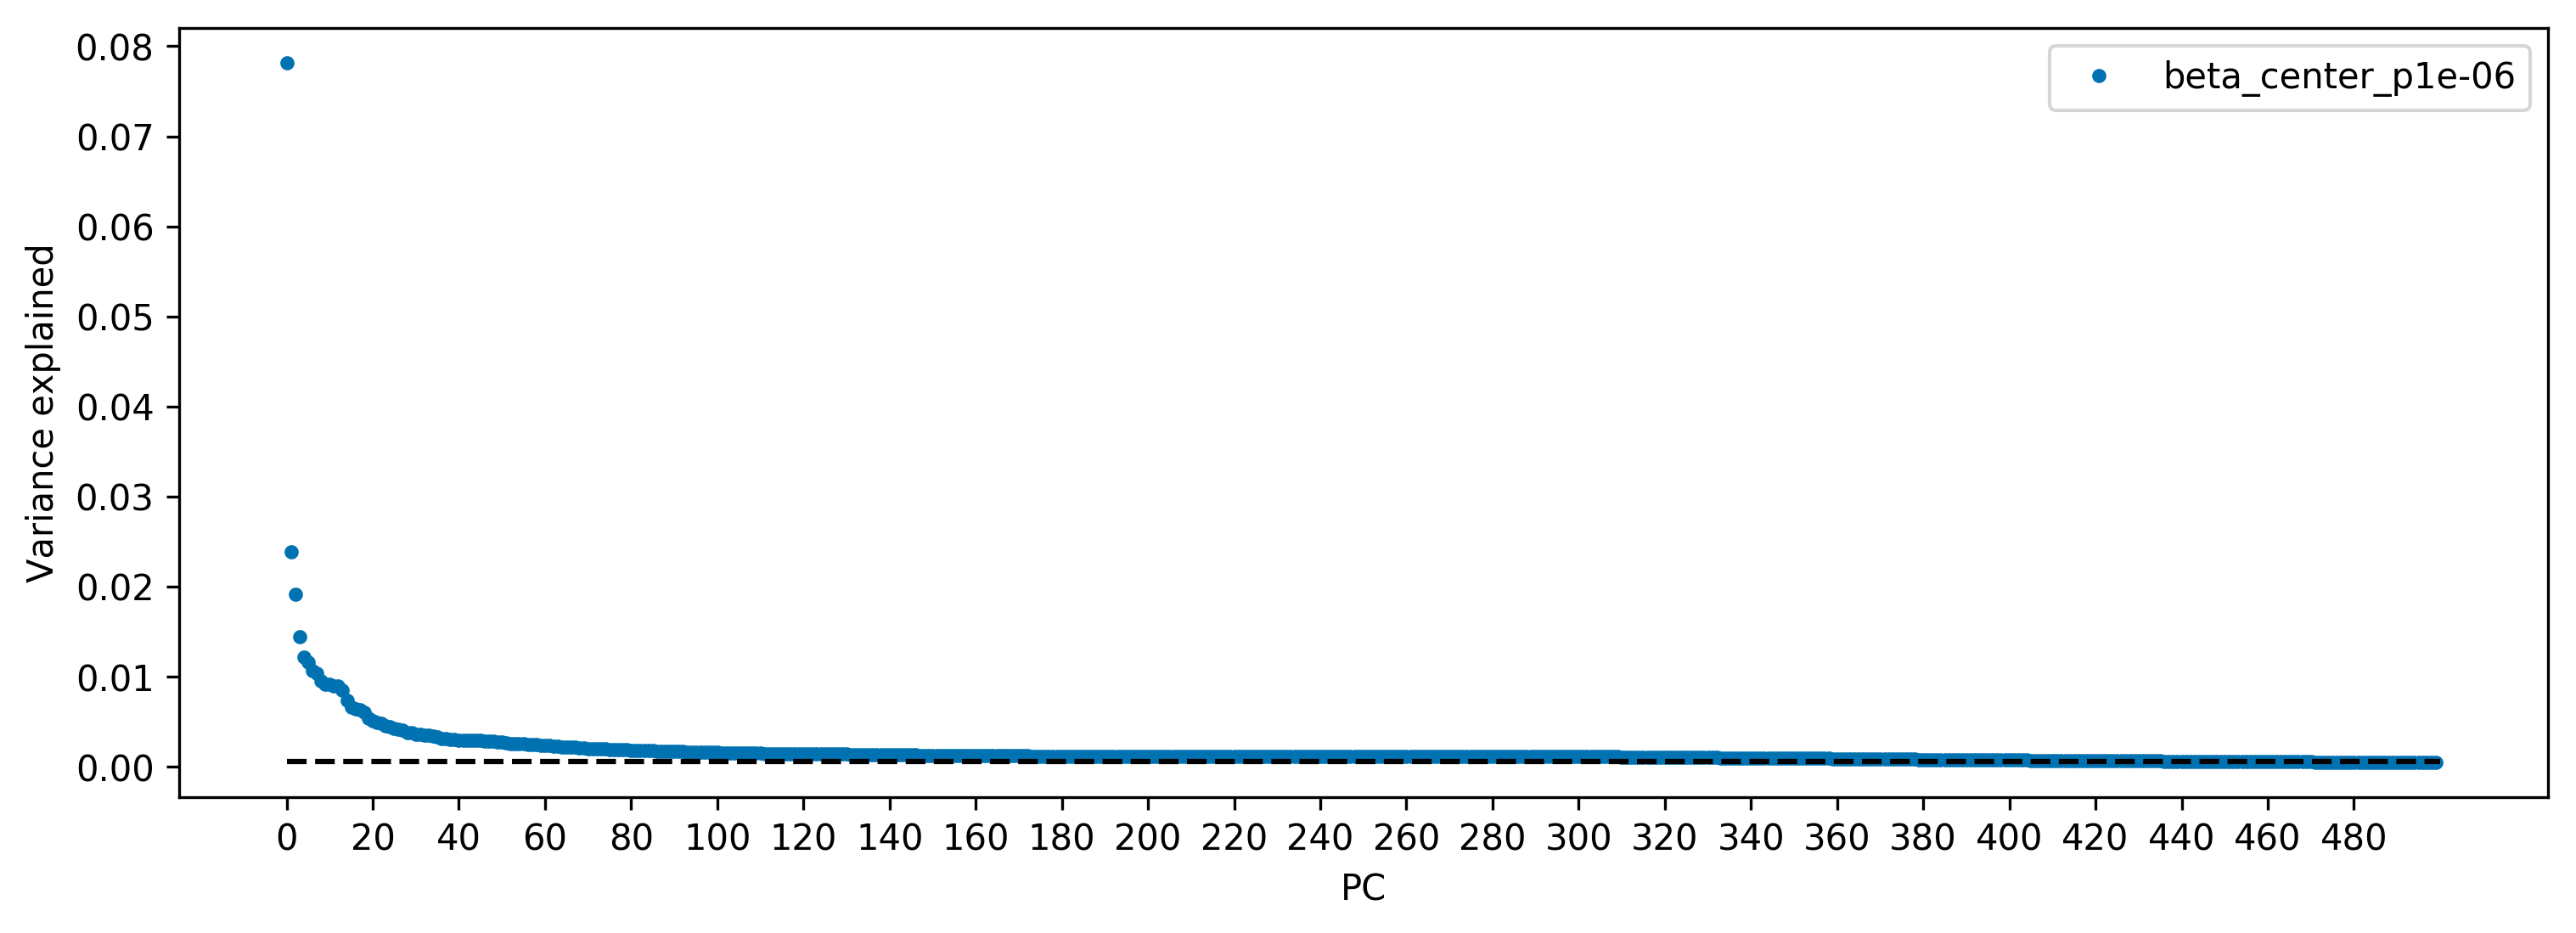

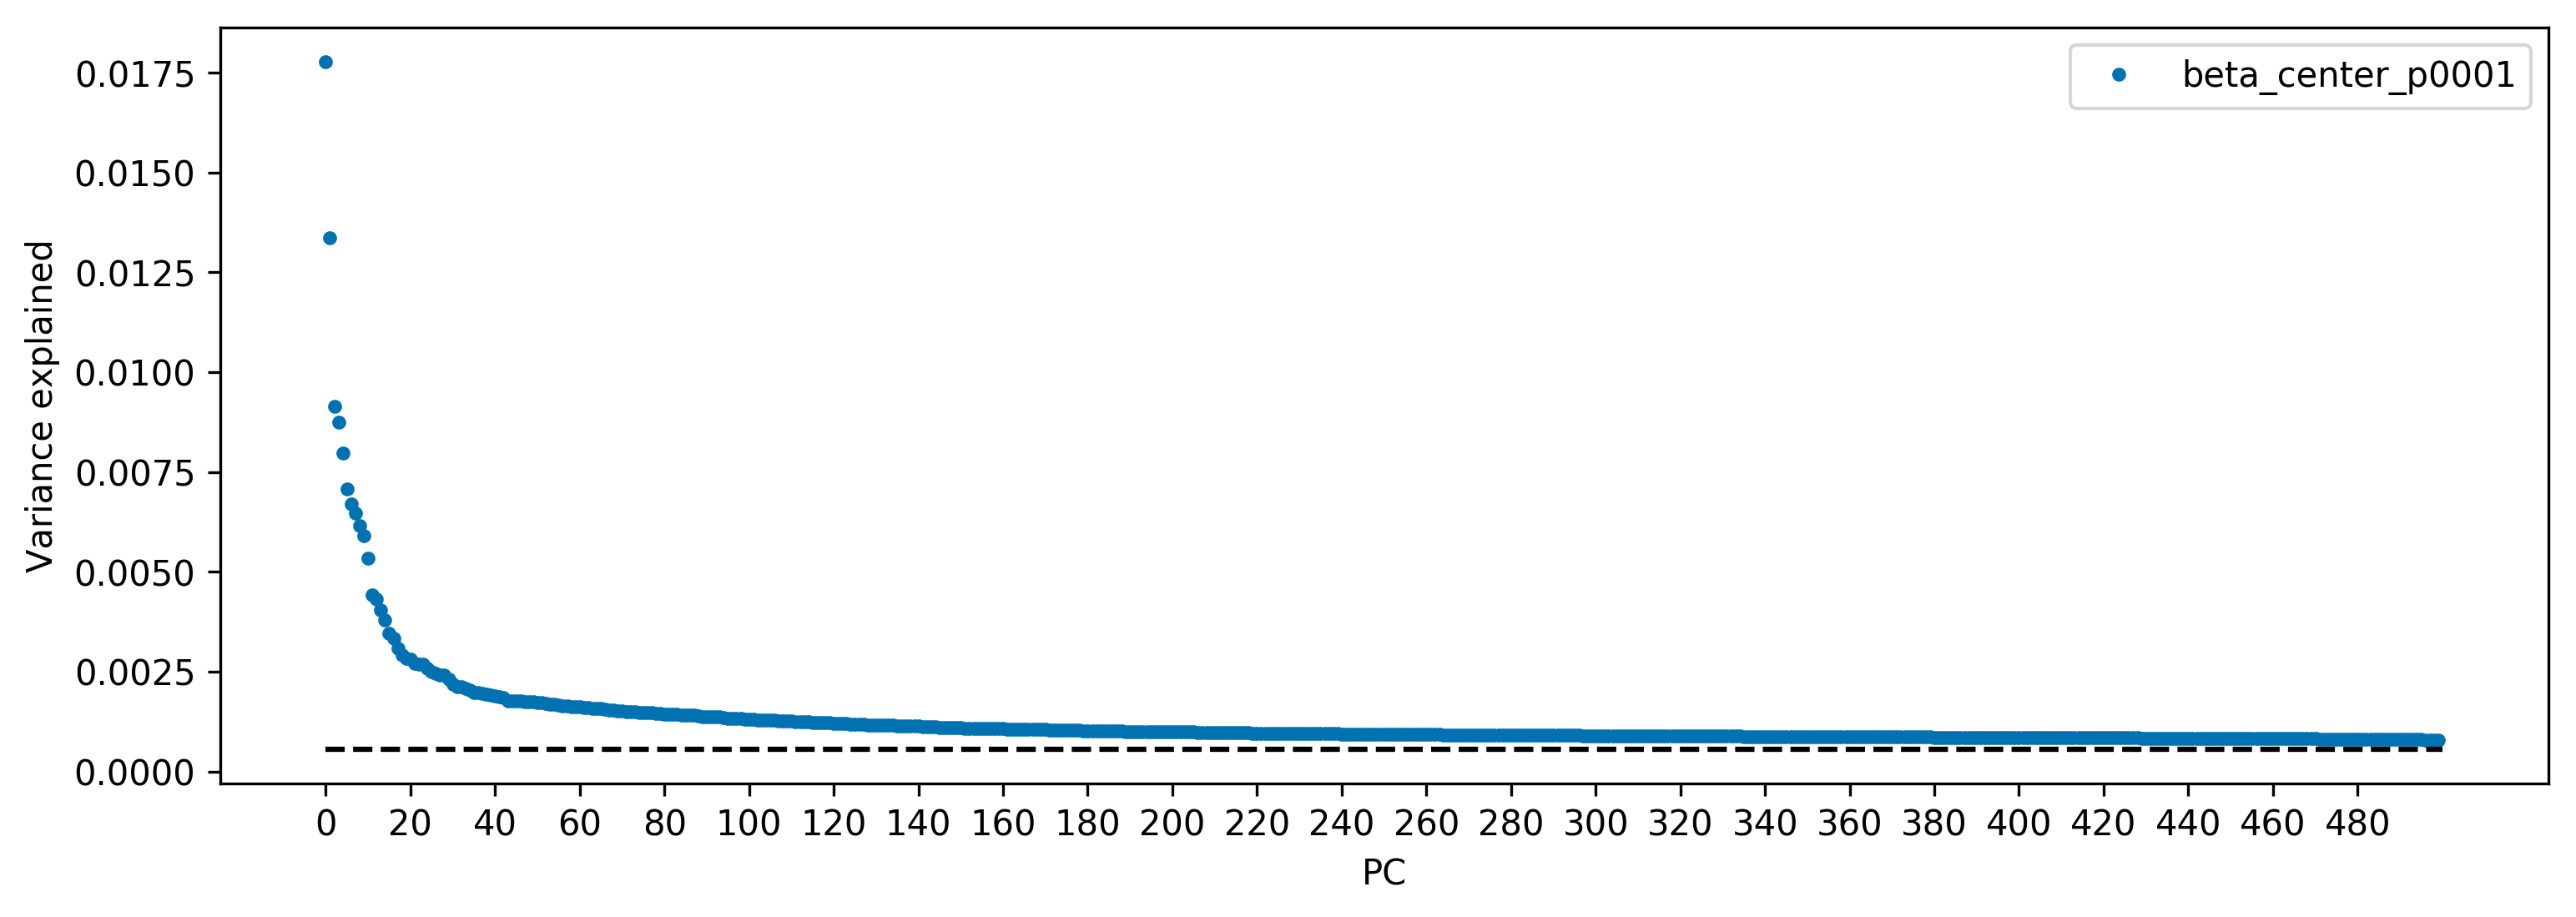

In [23]:
for npz in npzs:
    z=np.load(npz)
    plt.figure(figsize=(12,4), dpi=300)
    plt.plot(np.arange(z['D'].shape[0]), z['variance_explained_ratio'], '.')
    plt.xticks(np.arange(0,z['D'].shape[0],20))
    plt.xlabel('PC'),plt.ylabel('Variance explained')
    plt.plot([0,z['D'].shape[0]],[1.0/z['V'].shape[0],1.0/z['V'].shape[0]], 'k--')
    plt.legend([os.path.splitext(os.path.basename(npz))[0][4:-16]]) #, 'Isotropic variance'])
    plt.show()